# Ramachandran

*/ Update July 2018 /*
by Alexis Salas-Burgos PhD

## MDAnalysis 
from https://www.mdanalysis.org

## MDTraj
from http://mdtraj.org

## PyTraj
from https://amber-md.github.io/pytraj/latest/index.html

## Prody
from http://prody.csb.pitt.edu

In [2]:
import MDAnalysis as mda
import mdtraj as mdt
import pytraj as mdp
import prody as pd

In [3]:
DCD = "tutorial/ubq_wb_eq.dcd"
PSF = "tutorial/ubq_wb.psf"
PDB = "tutorial/ubq_wb.pdb"
# load trajectory
#from MDAnalysis.tests.datafiles import PSF, DCD, PDB
## MDAnalysis
u = mda.Universe(PSF, DCD)
## MDTraj
t = mdt.load(DCD, top=PSF)
## PyTraj
p = mdp.load(DCD, top=PSF)

In [4]:
## MDTraj
atoms, bonds = t.topology.to_dataframe()
atoms[:5]

,serial,name,element,resSeq,resName,chainID,segmentID
0,None,N,N,1,MET,0,U
1,None,H,H,1,MET,0,U
2,None,H2,H,1,MET,0,U
3,None,H3,H,1,MET,0,U
4,None,CA,C,1,MET,0,U


(-3.141592653589793, 3.141592653589793)

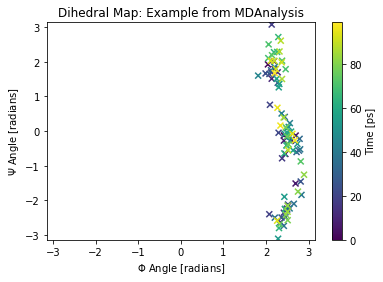

In [8]:
psi_indices, phi_indices = [6, 8, 14, 16], [4, 6, 8, 14]
angles = mdt.compute_dihedrals(t, [phi_indices, psi_indices])

import matplotlib.pyplot as plt
from math import pi

plt.figure()
plt.title('Dihedral Map: Example from MDAnalysis')
plt.scatter(angles[:, 0], angles[:, 1], marker='x', c=t.time)
cbar = plt.colorbar()
cbar.set_label('Time [ps]')
plt.xlabel(r'$\Phi$ Angle [radians]')
plt.xlim(-pi, pi)
plt.ylabel(r'$\Psi$ Angle [radians]')
plt.ylim(-pi, pi)

Gly residue indices =  [9, 34, 46, 52, 74, 75]


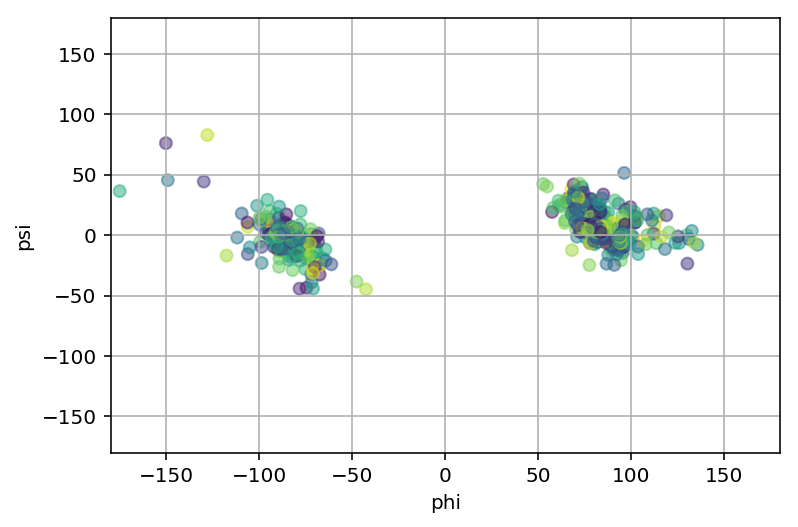

In [13]:
## PyTraj
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

# calculate phi/psi for Gly residues
# need to get indcies of Gly residues
indices = [idx for idx, res in enumerate(p.top.residues) if 'GLY' in res.name]
print('Gly residue indices = ', indices)

dataset = mdp.multidihedral(p, 'phi psi', resrange=indices[:5])
#print(dataset)

# take data for 'phi' and flatten to 1D array
phi = np.array([d.values for d in dataset if 'phi' in d.key]).flatten()

# take data for 'psi' and flatten to 1D array
psi = np.array([d.values for d in dataset if 'psi' in d.key]).flatten()

# setup color
colors = np.random.rand(len(psi))

plt.xlim([-180, 180])
plt.ylim([-180, 180])
plt.xlabel('phi')
plt.ylabel('psi')
plt.grid()
plt.scatter(phi, psi, alpha=0.5, c=colors)

plt.show()

-141.38635637662512 166.5539942289777 100


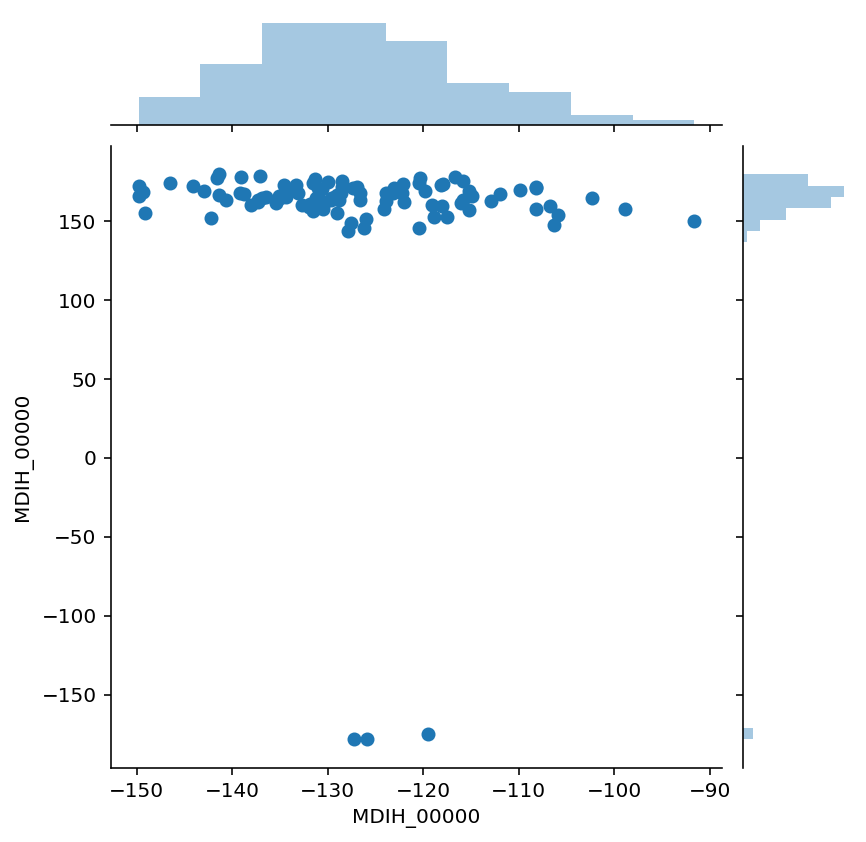

In [14]:
# only plot for residue 2 (python uses 0-based index)
phi, psi = mdp.multidihedral(p, resrange=[2,], dihedral_types='psi phi')
print(phi[0], psi[0], len(psi))

from matplotlib import pyplot as plt
import seaborn as snb
snb.jointplot(phi, psi, kind='scatter', stat_func=None)
#plt.savefig('phipsi_ala3.png')